# Housing Price Prediction using a Neural Network

## Objective
In this exercise, you will:
1. Create a synthetic dataset for housing prices based on a linear equation.
2. Build and train a simple neural network with one neuron to predict housing prices.

---

## Step 1: Import Libraries
Let's start by importing the necessary libraries.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

---

## Step 2: Create a Synthetic Dataset
We will create a dataset for housing prices that follows the equation

$\text{price}$ = $\text{number of bedrooms}$ $\times  x$ + $\text{base price}$


In [21]:
# Number of samples
n_samples = 1000

# Generate random number of bedrooms between 1 and 5
bedrooms = np.random.randint(1, 6, n_samples)

# Constants for the equation
x = 0.5  # The price added per bedroom in onehundred thousands
base_price = 1  # Base price of a house in onehundred thousands

# Generate housing prices based on the equation
prices = bedrooms * x + base_price

# Create a DataFrame
df = pd.DataFrame({'bedrooms': bedrooms, 'price': prices})

# Show the first few rows
df.head()

,bedrooms,price
0,3,2.5
1,5,3.5
2,2,2.0
3,3,2.5
4,3,2.5


---

## Step 3: Visualize the Data
Plot the data to visualize the relationship between the number of bedrooms and the price.


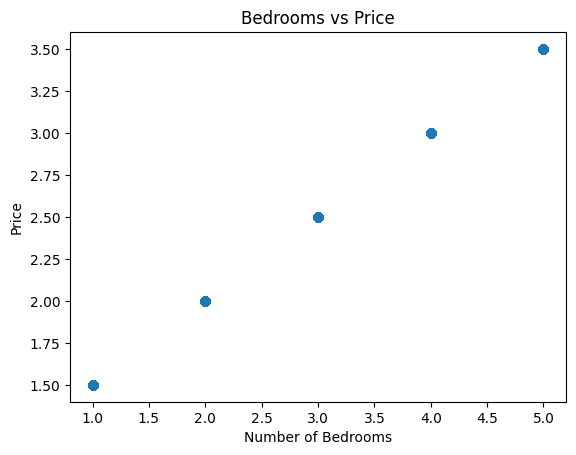

In [22]:
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs Price')
plt.show()


---

## Step 4: Preprocess the Data
Split the data into features (`X`) and labels (`y`), and then into training and testing sets.


In [23]:
# Features and Labels
X = df[['bedrooms']]
y = df['price']

# TODO Split the data
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


---

## Step 5: Build a Neural Network
Build a simple neural network with one neuron to predict the house prices.
Pick an optimizer and a loss function that suits this problem.


In [24]:
# TODO Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# TODO Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# TODO print a Summary of the model
model.summary()


c:\Users\ayham\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

---

## Step 6: Train the Model
Train the model using the training data.


In [25]:
# TODO Train the model
history = model.fit(X_train, y_train, epochs=100, verbose=0)

---

## Step 7: Evaluate the Model
Evaluate the model using the test data and plot its prediction.


Test Loss: 0.2357
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


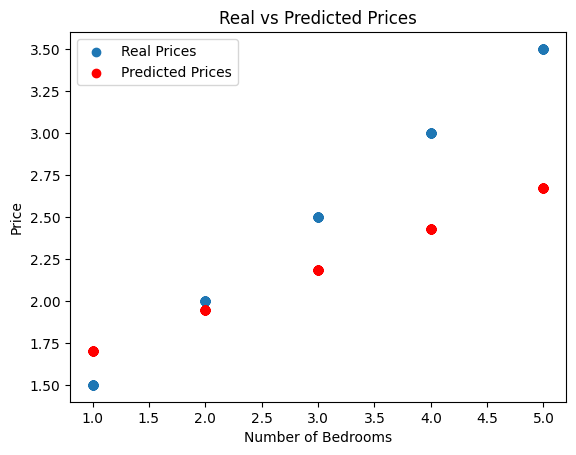

In [26]:
# TODO Evaluate the model using the model.evaluate() function
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")

# TODO Make predictions
predictions = model.predict(X_test)

# TODO Plot real vs predicted prices (hint: you can use the plotting code from above as a start)
plt.scatter(X_test, y_test, label='Real Prices')
plt.scatter(X_test, predictions, label='Predicted Prices', color='red')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Real vs Predicted Prices')
plt.legend()
plt.show()

# Step 8: Optional
Go back to the start and experiment what happens if instead of representing a price of a house costing onehundred thousand by a 1 we use the raw number 100,000 instead.

Try to explain what happened and why.